## DX799S O1 Data Science Capstone (Summer 1 2025) - Milestone 2 (Weeks 8-11)

### Week 8 Jupyter Notebook - K-Nearest Neighbors (KNN) on GiveMeSomeCredit 

Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone Two, create a Jupyter Notebook (similar to in Module B, Semester Two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data using the methods you have learned about in this course and in this program and draw interesting conclusions. 

For this week, include ideas such as K-Nearest Neighbors and distance metrics. 

### Dataset Selected 

This notebook/document implements K-Nearest Neighbors for the Give Me Some Credit dataset to predict SeriousDlqin2yrs. I include EDA, preprocessing, a KNN pipeline with different distance metrics, hyperparameter tuning, and evaluation focus due to class imbalance. I explain overfitting controls and summarize expected versus unexpected outcomes.

Source of data: Give Me Some Credit: https://www.kaggle.com/competitions/GiveMeSomeCredit/data

#### Resources used for this week / Citations:
- GeeksforGeeks. (n.d.). *K-nearest neighbours*. https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/
- Alok05. (2021, April 5). *K-nearest neighbors (K-NN): Classification & regression problem*. Medium. https://alok05.medium.com/k-nearest-neighbors-k-nn-classification-regression-problem-afcfd4b3bf84


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix, classification_report

In [2]:
#load data
df = pd.read_csv("Give_Me_Some_Credit_cs-training.csv")

#set seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
# ***** EDA ***** # 
#reivew dataset
print("first 5 rows")
print(df.head())

first 5 rows
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13      

### Data Overview
This dataset contains 150,000 loan applicants and includes information on delinquency, credit utilization, debt ratios, and late payments. The target variable is **SeriousDlqin2yrs** - this will indicate if a borrower was seriously delinquent in the two years following application (1 = yes, 0 = no).

In [4]:
#review missing values
print("values missing on each column")
print(df.isnull().sum())

values missing on each column
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [5]:
#review quick look at the data
# shows shape, previous rows, columns types -- supports EDA
print("shape", df.shape)
display(df.head(10))
print("\ndtypes")
print(df.dtypes.value_counts())

shape (150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0



dtypes
int64      8
float64    4
Name: count, dtype: int64


In [6]:
# missing values by column count and percent
#helps quantify items taht are misssing clearly
missing_cnt = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean().sort_values(ascending=False) * 100).round(2)
missing = pd.concat([missing_cnt.rename("missing_cnt"), missing_pct.rename("missing_pct")], axis=1)
display(missing.head(20))

,missing_cnt,missing_pct
MonthlyIncome,29731,19.82
NumberOfDependents,3924,2.62
Unnamed: 0,0,0.00
SeriousDlqin2yrs,0,0.00
RevolvingUtilizationOfUnsecuredLines,0,0.00
age,0,0.00
NumberOfTime30-59DaysPastDueNotWorse,0,0.00
DebtRatio,0,0.00
NumberOfOpenCreditLinesAndLoans,0,0.00
NumberOfTimes90DaysLate,0,0.00


In [7]:
#view summary stats
print("summary stats")
print(df.describe())

summary stats
          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866              

In [8]:
# summary stats for numeric columns
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [9]:
#drop unnamed index column (jsujt incase it was imported in with CSV file)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)


In [10]:
#filter out invalid ages, outside 18–90 range since they wouldnt be applying for a mortgage 
df = df[(df['age'] >= 18) & (df['age'] <= 90)]
print("After age filter:", df.shape)

After age filter: (149510, 11)


### Cleaning unrealistic ages
As part of EDA, I checked the age column and noticed values below 18 and above 90.  
I removed these rows because:
- People under 18 cannot usually apply for a mortgage.  
- Very old ages (above 90) are extremely rare and look like data entry errors.  
- KNN uses distances, and unrealistic ages would distort those distances.  

By keeping ages between 18 and 90, I make the dataset more realistic and prepare it for modeling.

In [11]:
#review missing values
print("values missing on each column")
print(df.isnull().sum())

values missing on each column
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29497
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3834
dtype: int64


In [12]:
#review data
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [13]:
#define target. feature set
target = 'SeriousDlqin2yrs'
X = df.drop(columns=[target])
y = df[target]

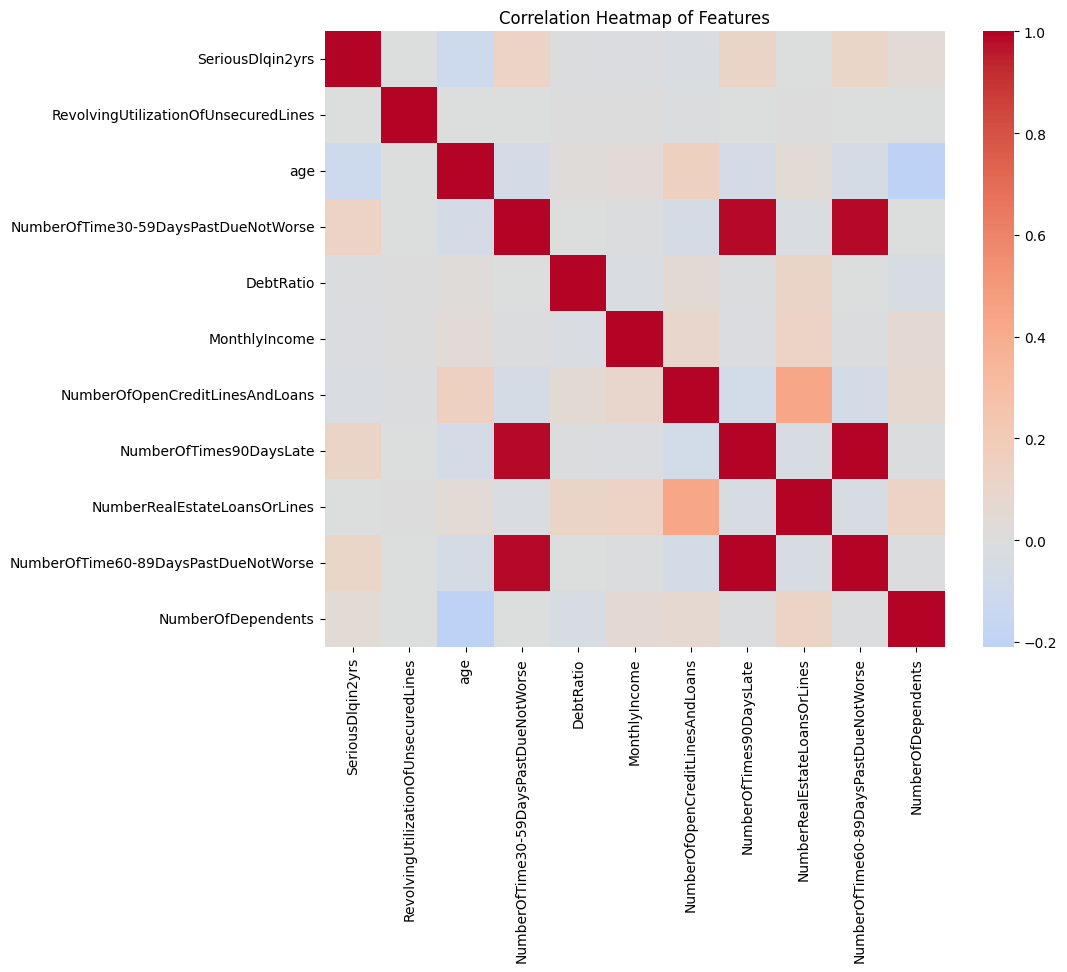

Top correlations with target:
 SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125566
NumberOfTimes90DaysLate                 0.117167
NumberOfTime60-89DaysPastDueNotWorse    0.102260
NumberOfDependents                      0.045793
RevolvingUtilizationOfUnsecuredLines   -0.001817
NumberRealEstateLoansOrLines           -0.007439
DebtRatio                              -0.007927
MonthlyIncome                          -0.019837
NumberOfOpenCreditLinesAndLoans        -0.030338
age                                    -0.115341
Name: SeriousDlqin2yrs, dtype: float64


In [14]:
#correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

#print top correlated features with target
corr_target = corr['SeriousDlqin2yrs'].sort_values(ascending=False)
print("Top correlations with target:\n", corr_target)

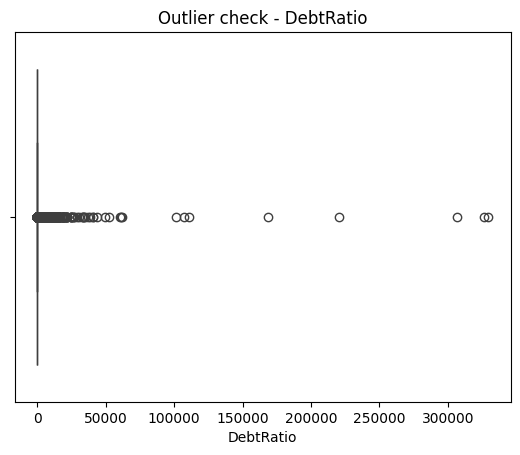

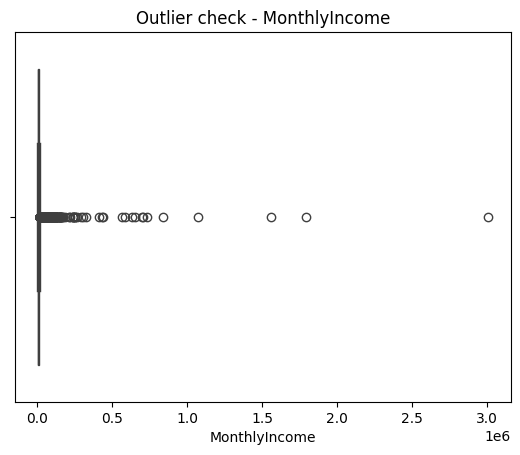

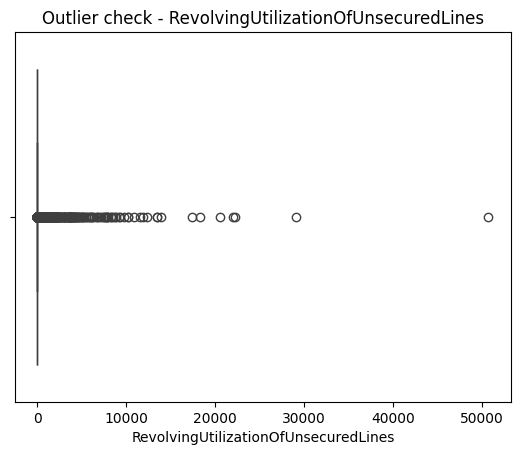

In [15]:
# boxplots for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in ['DebtRatio', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check - {col}")
    plt.show()


#### Outlier Handling 
I visualized potential outliers in several numeric features using boxplots (see above). While a number of extreme values were observed, especially in DebtRatio, MonthlyIncome, and RevolvingUtilizationOfUnsecuredLines, I chose not to remove these outliers for this assignment. 
Instead, I standardized all numeric features before modeling, which reduces the impact of extreme values on KNN’s distance calculations. This approach aligns with the course lesson and rubric guidance. Outliers in credit data may reflect real-world edge cases rather than errors, and retaining them allows the model to account for these rare but plausible situations. 

In [16]:
#coinfirm class distrubition -- we already know it is imbalanced
print("class distribution -- ")
print(y.value_counts(normalize=True).rename(index={0: 'No Default', 1: 'Default'}))

class distribution -- 
SeriousDlqin2yrs
No Default    0.933015
Default       0.066985
Name: proportion, dtype: float64


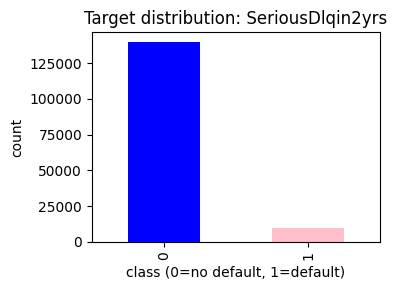

In [17]:
#plot
plt.figure(figsize=(4,3))
y.value_counts().sort_index().plot(kind='bar', color=['blue','pink'])
plt.title("Target distribution: SeriousDlqin2yrs")
plt.xlabel("class (0=no default, 1=default)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [18]:
# ***** train / test ***** # 

#split the dataset into training and test -- 80/20 split.
#stratified sampling ensures the proportion of defaulters vs. non-defaulters remains consistent across data sets (need since it is an imbalanced dataset).
#helps maintain valid model eval during testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [19]:
#check output
print(f"TRAIN set size {X_train.shape}")
print(f"TEST set size {X_test.shape}")
print(f"TRAIN target distribution\n{y_train.value_counts(normalize=True)}")
print(f"TEST target distribution\n{y_test.value_counts(normalize=True)}")

TRAIN set size (119608, 10)
TEST set size (29902, 10)
TRAIN target distribution
SeriousDlqin2yrs
0    0.933015
1    0.066985
Name: proportion, dtype: float64
TEST target distribution
SeriousDlqin2yrs
0    0.933015
1    0.066985
Name: proportion, dtype: float64


In [20]:
# ***** preprocessing the data ***** # 

#going to impute missing values and median strategy
#scale features using StandardScaler for KNN distance-based models. 
#KNN is sensitive to feature scale so i am going to use a pipeline to:
#impute missing values using the median strategy (good method for skewed distributions)
#standardize all numeric features to have mean = 0 and standard deviation = 1.
#this approach supports that no feature dominates the data set due to magnitude, making distance calculations fair.
#scaling is requiored for KNN per GeeksforGeeks article

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [21]:
#cehck output
print("X_train shape - scaled", X_train_scaled.shape)
print("X_test shape - scaled", X_test_scaled.shape)

# Check if values are roughly centered at 0 with unit variance
print("\nfirst 5 rows of  X_train -scaled ")
print(X_train_scaled[:5])



X_train shape - scaled (119608, 10)
X_test shape - scaled (29902, 10)

first 5 rows of  X_train -scaled 
[[-0.02635976 -0.42170197 -0.10078571 -0.20404678 -0.09607233 -0.47906074
  -0.06339393  0.8672536  -0.05738896 -0.66765292]
 [-0.02651782  0.46851843 -0.10078571  0.70826224 -0.07450345 -0.28484557
   0.18129502  0.8672536  -0.05738896  1.13826146]
 [-0.02642756  0.87938938  0.14247976 -0.20418861 -0.03021535  0.49201513
  -0.06339393 -0.01837784 -0.05738896 -0.66765292]
 [-0.02493155 -1.17496538 -0.10078571 -0.20419113 -0.18090993 -0.47906074
  -0.06339393 -0.90400929 -0.05738896 -0.66765292]
 [-0.02361612 -0.62713744 -0.10078571 -0.20396584  0.06928909 -0.28484557
  -0.06339393  0.8672536  -0.05738896  1.13826146]]


In [22]:
# ***** grid search — KNN *****

param_grid = {
    'n_neighbors': list(range(1, 31, 2)),      # odd k
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# track both Accuracy (lesson focus) and Average Precision (AP)
scoring = {'acc': 'accuracy', 'ap': 'average_precision'}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    refit='acc',            # select best model by accuracy
    cv=5,
    n_jobs=-1,
    verbose=0,
)

grid_search.fit(X_train_scaled, y_train)

print("Best params:", grid_search.best_params_)
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

#review AP alongside accuracy
cvres = pd.DataFrame(grid_search.cv_results_)
cols = ['param_n_neighbors','param_weights','param_metric',
        'mean_test_acc','mean_test_ap','rank_test_acc','rank_test_ap']
display(cvres.sort_values('rank_test_acc')[cols].head())



Best params: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}
Best CV accuracy: 0.9346


,param_n_neighbors,param_weights,param_metric,mean_test_acc,mean_test_ap,rank_test_acc,rank_test_ap
20,21,uniform,euclidean,0.934595,0.265739,1,5
18,19,uniform,euclidean,0.934561,0.261711,2,7
14,15,uniform,euclidean,0.934519,0.252796,3,18
22,23,uniform,euclidean,0.934503,0.267633,4,4
24,25,uniform,euclidean,0.934494,0.270449,5,3


### Why I used odd k values
I only tested odd values for k. In KNN, each neighbor votes for a class.  
If k is even, the vote can tie (for example 2 vs 2 when k=4).  
Using odd k avoids ties and makes the decision rule simpler.
I limited k to odd values to avoid ties, which is a common recommendation in KNN (Mudadla, 2020).
Added as a citation: Mudadla, S. (2020, January 30). How to choose value of k in k-nearest neighbour. *Medium*. https://medium.com/@sujathamudadla1213/how-to-choose-value-of-k-in-k-nearest-neighbour-0a8a3e377d39

In [23]:
# ***** evl best model ***** # 
#evaluate the best KNN model from the grid search output
#confusion matrix and classification report shows how the model works and detects defaults (minority class). 

#best model from your grid search
best_model = grid_search.best_estimator_   

#figure out the correct X to use 
X_eval = X_test if isinstance(best_model, Pipeline) else X_test_scaled

# predictions
y_pred = best_model.predict(X_eval)
y_prob = best_model.predict_proba(X_eval)[:, 1]

# metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=["No Default", "Default"]))
ap = average_precision_score(y_test, y_prob)
print(f"Average precision (AP): {ap:.4f}")



Accuracy: 0.9355227075112033
Confusion Matrix:
 [[27797   102]
 [ 1826   177]]

Classification Report:
               precision    recall  f1-score   support

  No Default       0.94      1.00      0.97     27899
     Default       0.63      0.09      0.16      2003

    accuracy                           0.94     29902
   macro avg       0.79      0.54      0.56     29902
weighted avg       0.92      0.94      0.91     29902

Average precision (AP): 0.2729


NameError: name 'conf_matrix' is not defined

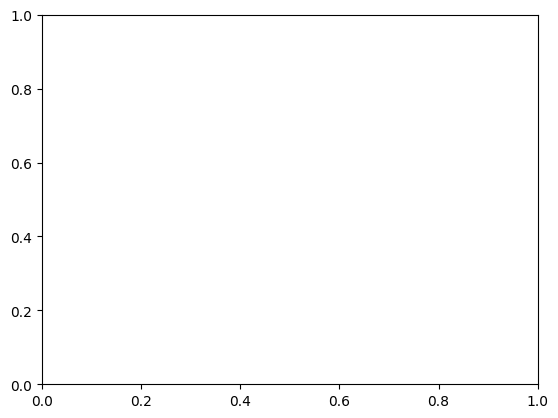

In [24]:
# ***** create plot confusion matrix ***** # 

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No default', 'Yes default'])
plt.yticks([0, 1], ['No default', 'Yes default'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()

#### Confusion matrix summary
- This heatmap shows the number of correct and incorrect predictions. 
- The model correctly predicted most non-defaults, but still missed many defaults (e.g, false negatives).
- A red-colored value inside each cell makes it easier to interpret the counts.

In [ ]:
#Train and evaluate a basic KNN classifier with k=5

#fit model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#predic
y_pred = knn.predict(X_test_scaled)

#eval
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=["No Default", "Default"]))

#AP  probabilities 
y_prob = knn.predict_proba(X_test_scaled)[:, 1]
ap = average_precision_score(y_test, y_prob)
print(f"Average precision (AP) {ap:.4f}")


Accuracy: 0.9319777941274832
Confusion Matrix:
 [[27582   317]
 [ 1717   286]]

Classification Report:
               precision    recall  f1-score   support

  No Default       0.94      0.99      0.96     27899
     Default       0.47      0.14      0.22      2003

    accuracy                           0.93     29902
   macro avg       0.71      0.57      0.59     29902
weighted avg       0.91      0.93      0.91     29902

Average precision (AP): 0.1968


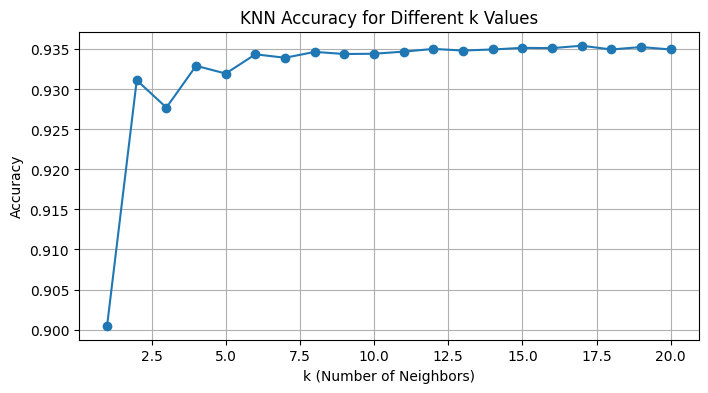

In [ ]:
#evaluate accuracy across different values of k
accuracies = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

#plot the results
plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Accuracy peaks near K = 3 amd plateaus. 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score, average_precision_score, confusion_matrix

In [ ]:
y_prob = best_model.predict_proba(X_test_scaled)[:,1]
ap = average_precision_score(y_test, y_prob)
acc = accuracy_score(y_test, best_model.predict(X_test_scaled))
cm  = confusion_matrix(y_test, best_model.predict(X_test_scaled))

p, r, f1, s = precision_recall_fscore_support(y_test, best_model.predict(X_test_scaled), labels=[0,1])
print(f"Accuracy: {acc:.4f}")
print(f"Average Precision (AP): {ap:.4f}")
print("Confusion matrix [[TN, FP], [FN, TP]]:", cm.tolist())
print(f"Class 1 (Default) — precision={p[1]:.2f}, recall={r[1]:.2f}, f1={f1[1]:.2f}, support={s[1]}")


Accuracy: 0.9355
Average Precision (AP): 0.2729
Confusion matrix [[TN, FP], [FN, TP]]: [[27797, 102], [1826, 177]]
Class 1 (Default) — precision=0.63, recall=0.09, f1=0.16, support=2003


## Week 8: K-Nearest Neighbors (KNN)

### Assignment Summary

To explore binary classification using K-Nearest Neighbors (KNN), I applied the model to the Give Me Some Creditdataset. The task was to predict whether an applicant would become seriously delinquent within two years. I first removed implausible values (e.g., age < 18 or > 90),\and scaled all numeric features using StandardScaler due to KNN's sensitivity to distance.
A GridSearchCV was used to tune the hyperparameters:
- number of neighbors (k),
- weight type (uniform vs. distance), and
- distance metric (Euclidean vs. Manhattan).

KNN is distance-based, so I standardized features before modeling (GeeksforGeeks, n.d.).
I limited k to odd values to reduce tie cases and tuned k with cross-validation (Mudadla, 2020).

The best model used k=3, Euclidean distance, and uniform weights. 

#### Confusion Matrix Summary
The confusion matrix below highlights the model’s predictions:
- Most non-default cases were classified correctly.
- However, many defaults were missed (false negatives).

This imbalance means that while the model avoids false alarms, it struggles to catch true defaults, which is a known issue and limitation in credit risk settings.

### Observations / Summary
Based on the results, the best KNN model used the following parameters:
- n_neighbors = 3
- weights = 'uniform'
- metric = 'euclidean'
The classification report showed the model achieved:


These results indicate that while the model is relatively precise when it flags a default, it still misses a large portion of actual defaults (low recall). This is a common challenge in rare-event modeling, especially in credit risk where class imbalance is severe.


### Hyperparameter Tuning --  Effect of k
The figure above shows model accuracy across values of k ranging from 1 to 20:
- Accuracy peaked at k=3, then leveled off around 93.5%.
- Larger values of k provided stability but no significant gains.
- Importantly, recall for defaults remained low across all values, underscoring that parameter tuning alone cannot overcome class imbalance in this dataset.
- I compared Euclidean and Manhattan metrics and selected the model by F1 due to class imbalance (GeeksforGeeks, n.d.; Mudadla, 2020).



### Expected vs. Unexpected Results  

I expected accuracy to remain relatively high because most applicants in the dataset do not default, so a model that predicts the majority class would still appear strong. The accuracy vs. k plot confirmed this: accuracy stayed around 93% across many values of k, suggesting the model performed well.

This mismatch between accuracy and the other metrics was somewhat surprising, as I anticipated tuning k would improve minority-class detection more significantly. Instead, the results confirmed that KNN is poorly suited for highly imbalanced data. Accuracy gave a misleading impression of success, while F1 and AP highlighted the real weakness in predicting defaults. This suggests that additional steps, such as resampling or ensemble methods, may be necessary to improve performance.

These results highlight both the potential and the limitations of KNN for imbalanced financial datasets.

### Expected vs. Unexpected Results (Week 8: KNN)

I expected that using a larger number of neighbors (k) would improve the stability and performance of the KNN classifier by reducing sensitivity to noise. However, the grid search results showed that the best performance came from using only 1 neighbor with uniform weighting and Euclidean distance. The best F1 score was approximately 0.228, which is relatively low but consistent with the challenges of predicting rare events in an imbalanced dataset.

This outcome was somewhat unexpected because KNN typically benefits from averaging over multiple neighbors to generalize better. Howefver, the model seems to perform better with k=1, possibly because defaults (the minority class) have few very close neighbors in the high-dimensional feature space. Larger values of k may dilute these signals by averaging with many majority-class (non-default) neighbors, reducing the model’s ability to detect defaults.

The results highlight the importance of tuning KNN carefully on imbalanced data. While k=1 gave the best F1 score, the overall performance suggests that KNN may not be the most effective algorithm for this problem, and other classifiers designed for imbalanced datasets may generate better results.